# Load packages and data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.txt', sep=",", header=0, index_col = 0)
data.dtypes
# some of the columns have bad data, since all columns contain numeric data

ID                              int64
Clump Thickness                 int64
Uniformity of Cell Size        object
Uniformity of Cell Shape       object
Marginal Adhesion              object
Single Epithelial Cell Size    object
Bare Nuclei                    object
Bland Chromatin                object
Normal Nucleoli                object
Mitoses                        object
Class                          object
dtype: object

## Data cleaning

In [3]:
# check the categories present in the data
for column in list(data.columns[1:]):
    print(column, data[column].unique())
# nas are represented in different ways as nan, '#', '?', and 'No idea'    
# and some entreis have class value as 20 or 40, while expected 2 or 4

Clump Thickness [  7   6   8   5  10   3   4   1  70  80 100   2   9  50  30  40  60]
Uniformity of Cell Size ['8' '10' '6' '5' '4' '9' '3' '1' 'No idea' '2' '7' '50' '100' '30' nan
 '#' '?' '80' '40' '60' '90' '20']
Uniformity of Cell Shape ['3' '5' '4' '6' '10' '7' '1' 'No idea' '2' '60' '100' '40' nan '#' '9'
 '8' '?' '30' '50' '70']
Marginal Adhesion ['7' '5' '10' '3' '6' '4' '1' '2' 'No idea' '30' '40' nan '#' '8' '?' '70'
 '60' '100' '50' '9' '20']
Single Epithelial Cell Size ['4' '10' '3' '6' '2' '8' 'No idea' '1' '30' nan '5' '#' '?' '40' '20' '7'
 '60' '80' '100' '9']
Bare Nuclei ['5' '10' '1' '8' '2' '3' '6' 'No idea' '?' '80' '60' '30' nan '100' '#'
 '9' '50' '7' '4' '20']
Bland Chromatin ['7' '6' '3' '2' '4' 'No idea' '1' '5' '70' '30' nan '40' '#' '10' '8' '?'
 '20' '9' '60' '50']
Normal Nucleoli ['8' '10' '5' '4' '3' '7' '2' '6' '9' '1' 'No idea' '40' '90' '20' nan
 '30' '#' '?' '80' '60' '50' '100' '70']
Mitoses ['2' '1' '7' 'No idea' '3' '10' '70' '8' nan '20' '#' '6' '

### Coerce all data to be numeric
This will make the wrong entires NAs

In [4]:
data_n = data.apply(pd.to_numeric, errors='coerce')

### Handel rows with values that are 10 times as large

In [5]:
dat_10 = data_n[data_n.Class > 4]
dat_d10 = dat_10.iloc[:,1:]/10
dat_d10.insert(0, 'ID', dat_10['ID'])
# all values seem to be 10 times larger

In [6]:
dat = data_n[data_n.Class <= 4].append(dat_d10)

## Check number of unique IDs:

In [7]:
print(dat.ID.unique().shape)
# there are only 665 unique IDs
print(dat.shape)
# But there are 15776 rows of data?

(665,)
(15776, 11)


<function matplotlib.pyplot.show(*args, **kw)>

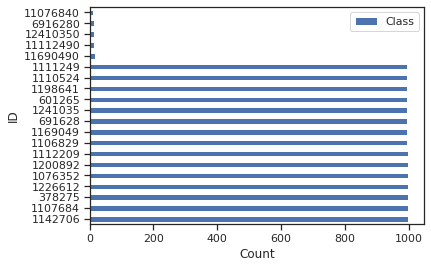

In [8]:
# look at how IDs repeated:
dat.groupby('ID').count().sort_values(by = 'Class', ascending=False).head(20).plot(y = "Class", kind = "barh")
plt.xlabel("Count")
plt.ylabel("ID")
plt.show

In [9]:
# look at the unique rows for these super-duplicated IDs:
id_dups = data.groupby('ID').count().sort_values(by = 'Class', ascending=False).head(15).reset_index().ID
data[data.ID.isin(id_dups)].drop_duplicates().sort_values('ID')
# each ID with lots of duplicates has only one or two unique rows with valid data
# also when there is missing value, clump thickness is the only column with full data

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
14901,378275,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2239,378275,10,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
6,378275,10,9,7,3,4,2,7,7,1,4
9243,601265,10,?,?,?,?,?,?,?,?,?
13663,601265,10,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea,No idea
5,601265,10,4,4,6,2,10,2,3,1,4
1188,601265,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8250,691628,8,#,#,#,#,#,#,#,#,#
3981,691628,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data_cleaned = dat.drop_duplicates()
print(data_cleaned.shape)

data_dups = data_cleaned.groupby('ID').count().\
            sort_values(by = 'Class', ascending=False).reset_index()[['ID', 'Class']]\
            .rename(columns={"Class": "ct"})

datac = data_cleaned.merge(data_dups, left_on='ID', right_on='ID')

datacc = datac[datac.ct == 1]
print(datacc.shape)
# there are 627 samples with only one row

(710, 11)
(627, 12)


- I am not sure whether a sample can have multiple rows
-  But having multiple data points from a sample will violate the assumption of independence
-  So I filtered the data down to the samples with only one entry

## Handling missing values

In [11]:
datacc[datacc.isnull().any(axis=1)]
# not a lot of NAs, and only in the Bare Nulei column
# will remove these

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,ct
23,1057067,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,2.0,1
73,1238464,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,1.0,2.0,1
120,169356,3.0,1.0,1.0,1.0,2.0,NaN,3.0,1.0,1.0,2.0,1
141,563649,8.0,8.0,8.0,1.0,2.0,NaN,6.0,10.0,1.0,4.0,1
196,61634,5.0,4.0,3.0,1.0,2.0,NaN,2.0,3.0,1.0,2.0,1
258,1096800,6.0,6.0,6.0,9.0,6.0,NaN,7.0,8.0,1.0,2.0,1
328,1241232,3.0,1.0,4.0,1.0,2.0,NaN,3.0,1.0,1.0,2.0,1
337,1193683,1.0,1.0,2.0,1.0,3.0,NaN,1.0,1.0,1.0,2.0,1
352,432809,3.0,1.0,3.0,1.0,2.0,NaN,2.0,1.0,1.0,2.0,1
365,1184840,1.0,1.0,3.0,1.0,2.0,NaN,2.0,1.0,1.0,2.0,1


In [12]:
dataf = datacc.dropna()
dataf.groupby('Class').count()
# The two classes are fairly balanced

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,ct
Class,,,,,,,,,,,
2.0,370,370,370,370,370,370,370,370,370,370,370
4.0,242,242,242,242,242,242,242,242,242,242,242


## Visualize the relationship between the different factors and cancer class:

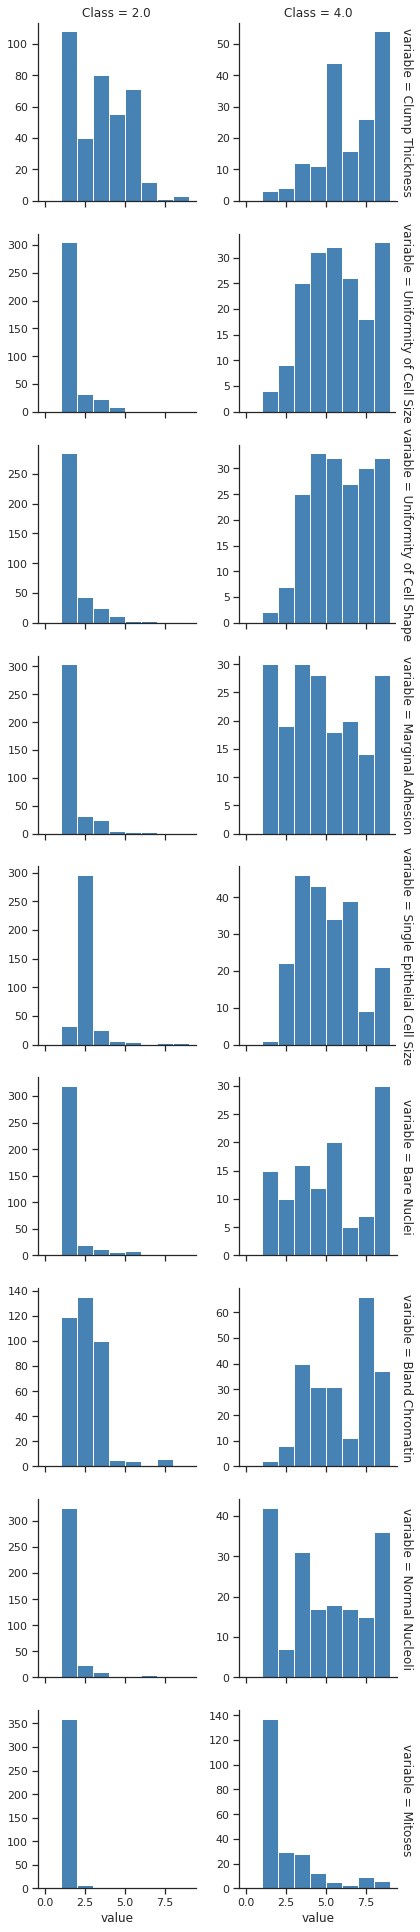

In [13]:
# Transform data into the long format for vis
dat_long_for_vis = pd.melt(dataf.iloc[:, 1:11], id_vars=['Class'])

# Make histograms faceted by class
bins = np.linspace(0, 9, 10)
g = sns.FacetGrid(dat_long_for_vis, row = "variable", col="Class", margin_titles=True, sharey= False)
g.map(plt.hist, "value", color="steelblue", bins = bins)

# All of the features have some importance

In [14]:
corr = dataf.iloc[:, 1:11].corr()
corr

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.633761,0.647224,0.463191,0.496289,0.588215,0.541983,0.515359,0.339748,0.722539
Uniformity of Cell Size,0.633761,1.000000,0.897416,0.690976,0.729015,0.675982,0.741886,0.714527,0.445678,0.813481
Uniformity of Cell Shape,0.647224,0.897416,1.000000,0.668010,0.697963,0.703285,0.721366,0.707558,0.430764,0.811272
Marginal Adhesion,0.463191,0.690976,0.668010,1.000000,0.577476,0.660417,0.648139,0.567573,0.390947,0.700522
Single Epithelial Cell Size,0.496289,0.729015,0.697963,0.577476,1.000000,0.557055,0.599305,0.607166,0.472580,0.670821
Bare Nuclei,0.588215,0.675982,0.703285,0.660417,0.557055,1.000000,0.673363,0.560206,0.326266,0.815630
Bland Chromatin,0.541983,0.741886,0.721366,0.648139,0.599305,0.673363,1.000000,0.645979,0.327885,0.743896
Normal Nucleoli,0.515359,0.714527,0.707558,0.567573,0.607166,0.560206,0.645979,1.000000,0.410937,0.703092
Mitoses,0.339748,0.445678,0.430764,0.390947,0.472580,0.326266,0.327885,0.410937,1.000000,0.413216
Class,0.722539,0.813481,0.811272,0.700522,0.670821,0.815630,0.743896,0.703092,0.413216,1.000000


## Check correlations between features:

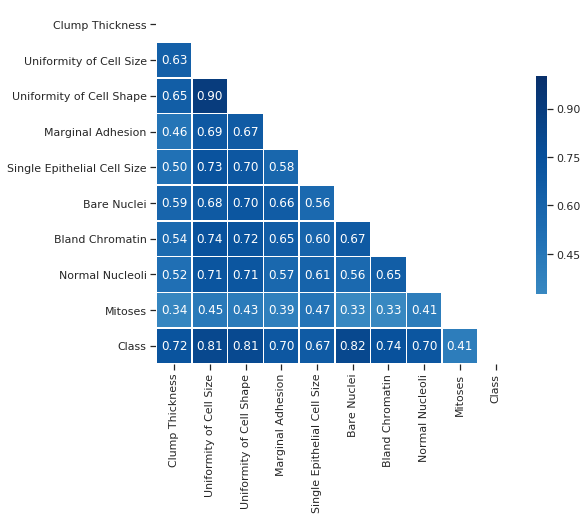

In [15]:
plt.figure(figsize=(8,8))

corr = dataf.iloc[:, 1:11].corr()

mask = np.triu(np.ones_like(corr))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap='Blues', annot=True, fmt='.2f', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# The correlations aren't super high

# Compare feature importance using modeling

In [16]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()
logib = LogisticRegression(class_weight='balanced')
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve

In [17]:
X = dataf.iloc[:, 1:10]
y = dataf['Class']/2 -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=55, stratify = y)

In [18]:
cross_validate(logi, X_train, y_train, cv=5, scoring = 'recall_weighted')

{'fit_time': array([0.0868628 , 0.02843404, 0.02885222, 0.02809811, 0.02553177]),
 'score_time': array([0.00741243, 0.00842738, 0.00596094, 0.00562048, 0.00594211]),
 'test_score': array([0.97560976, 0.96341463, 0.95121951, 0.91463415, 1.        ])}

In [19]:
scores = cross_validate(logib, X_train, y_train, cv=5, scoring = 'recall_weighted')
print(scores)
print(scores['test_score'].mean())
# balanced weight is better

{'fit_time': array([0.03479075, 0.0444684 , 0.02959847, 0.0309279 , 0.03213739]), 'score_time': array([0.00870395, 0.00566697, 0.00517964, 0.00572872, 0.00926089]), 'test_score': array([0.97560976, 0.97560976, 0.97560976, 0.93902439, 1.        ])}
0.9731707317073169


In [20]:
model = logib.fit(X_train, y_train)
y_pred = model.predict(X_test)

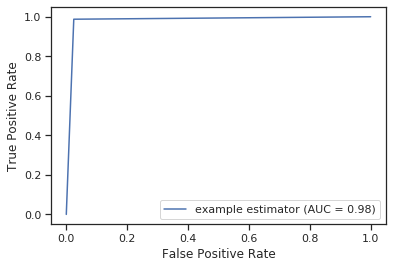

In [21]:
# ROC curve:
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='example estimator')
display.plot()  
plt.show()      

## Look at feature importance
Using coefficients from the logistic regression model

In [22]:
features = pd.DataFrame(data = {'feature': list(X.columns), 'importance': model.coef_.tolist()[0]})\
          .sort_values(by = 'importance')
features

,feature,importance
4,Single Epithelial Cell Size,0.016527
2,Uniformity of Cell Shape,0.071667
7,Normal Nucleoli,0.214676
6,Bland Chromatin,0.234438
3,Marginal Adhesion,0.360221
0,Clump Thickness,0.435399
8,Mitoses,0.453718
1,Uniformity of Cell Size,0.557233
5,Bare Nuclei,0.559384


## Look at alternative feature importance
Since collecting these data could be expensive, can we collect less data?
What if we only collect one type of the data?

In [23]:
# Function to test feature importance using just that feature
def feature_test(name):
    scores = cross_validate(logib, X_train[name][:, np.newaxis], y_train, cv=5, scoring = 'recall_weighted')
    return(scores['test_score'].mean())

In [24]:
s = []
for name in list(X.columns):
    s.append([name, feature_test(name)])

Text(0.5, 1.0, 'Feature importance for full model')

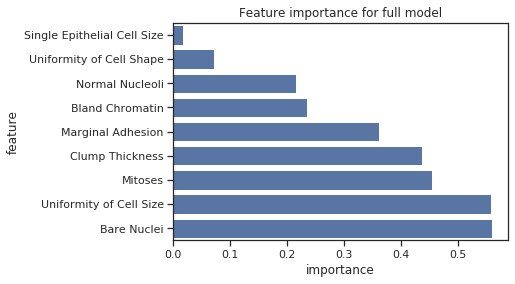

In [25]:
features2 = features.merge(pd.DataFrame(s, columns = ["feature", "single_importance"]), 
               left_on='feature', right_on='feature')

sns.barplot(x="importance", y="feature", data=features2,
            color="b")
plt.title("Feature importance for full model")

Text(0.5, 1.0, 'Recall for models with a single feature')

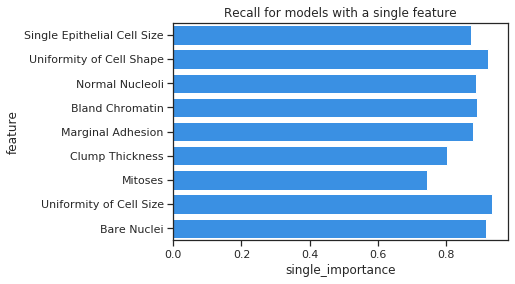

In [26]:
sns.set_color_codes("muted")
sns.barplot(x="single_importance", y="feature", data=features2,
            color="dodgerblue")
plt.title("Recall for models with a single feature")

## Feature selection using recursive elimination

In [27]:
from sklearn.feature_selection import RFECV
selector = RFECV(logib, step=1, cv=5, scoring = 'recall_weighted')
selector.fit(X_train, y_train)
selector.ranking_

array([1, 1, 2, 1, 3, 1, 1, 1, 1])

In [49]:
reduced_features = [x for x, y in zip(list(X_train.columns),list(selector.ranking_)) if y == 1]

scores = cross_validate(logib, X_train[reduced_features], y_train, cv=5, scoring = 'recall_weighted')
print(scores['test_score'].mean())

0.9707317073170731


Text(0.5, 1.0, 'Feature importance for reduced model')

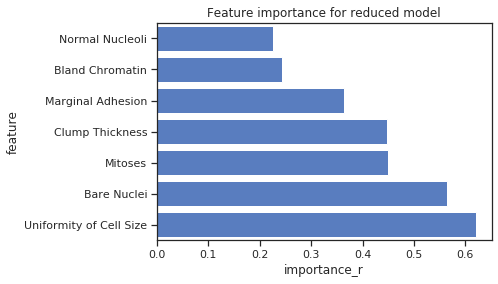

In [56]:
model_r = logib.fit(X_train[reduced_features], y_train)

r_features = pd.DataFrame(data = {'feature': reduced_features, 'importance_r': model_r.coef_.tolist()[0]})\
          .sort_values(by = 'importance_r')

sns.barplot(x="importance_r", y="feature", data=r_features,
            color="b")
plt.title("Feature importance for reduced model")

## Exporting all feature importance measures for bubble charts

In [58]:
features_all = features2.merge(r_features, how = 'outer',
               left_on='feature', right_on='feature')
features_all.to_csv("feature_importance.csv")

# Conclusion

The three most importance features that predict the cancer status of a sample are: 
- the number of Bare Nuclei
- the Uniformaty of cell size
- Mitoses

If data is available on all nine features, the logistic regression model has a 97% recall.

However, if resources is extremely limited, uniformity of cell size is the most informative feature on its own.